# Problem Set 1 CS174
---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

2. Write a function that checks whether a number is prime or not **1 pt.**

3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**
       - How many unique words are there?
       - List what will Rick Astley never do?
       - Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**
       - Use the dictionary from above to create a word count histogram.
       
### Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

Deadline **Feb 4 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

In [1]:
import time
print("Starting probset at {}".format(time.ctime()))

Starting probset at Thu Jan 30 20:27:42 2020


## 1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards)

In [2]:
def reverse_string(string):
    rev_string =""
    for i in range(len(string)):
        rev_string+=string[len(string)-i-1]
    return rev_string

def check_palindrome(string):
    if string == reverse_string(string):
        return True
    else:
        return False
    
def check_palindrome_alt(string):
    check = True
    i=0
    while check and len(string)-1 != i:
        if string[len(string)-i-1] == string[i]:
            check = True
            i+=1
        else: 
            check = False
    return check
        

In [3]:
string1 = "dahfgkasjdhfgakwservservsrvs3v424234v23ehfknausefckusfaevaervserbaseljfhvseaehcnraksehrackeshrackesucesucrkseuucucnrkaseurcnkuksdjhfksjdhfskdjfhskdjfhskdjfhskdjfhskjdfhskdjfhskurehfks nekfuhsekufsrvesrserbserbserberb3rb3rbw3rbrbsferfbrr2br2br2ber2berb2erb2erb2erb2erb2eb2r23b34234b324hsckehscerkjsehcrsekrhscklhafcnsuenv3489y39485739845hn7honsyoiuyfbosvuyfovs78bryvo7isyfov7sryfkhrkva"
string = string1 + reverse_string(string1)
print('method I:')
%time print('Positive result: {}'.format(check_palindrome(string)))
%time print('Negative result: {}'.format(check_palindrome(string1)))
print('-'*10)
print('method II:')
%time print('Positive result: {}'.format(check_palindrome_alt(string)))
%time print('Negative result: {}'.format(check_palindrome_alt(string1)))

method I:
Positive result: True
CPU times: user 576 µs, sys: 112 µs, total: 688 µs
Wall time: 682 µs
Negative result: False
CPU times: user 491 µs, sys: 199 µs, total: 690 µs
Wall time: 766 µs
----------
method II:
Positive result: True
CPU times: user 591 µs, sys: 70 µs, total: 661 µs
Wall time: 657 µs
Negative result: False
CPU times: user 40 µs, sys: 14 µs, total: 54 µs
Wall time: 47 µs


## 2. Write a function that checks whether a number is prime or not **1 pt.**

In [4]:
import math
def check_prime(number):
    if number <= 1:
        return False
    if number == 2:
        return True
    if number%2==0:
        print('even')
        return False
    for i in range(math.ceil(math.sqrt(number)))[3::]:
        if number%i==0:
            print(number,i)
            return False
    return True
    

In [5]:
%time check_prime(100153)

CPU times: user 42 µs, sys: 1e+03 ns, total: 43 µs
Wall time: 46.3 µs


True

## 3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

In [6]:
with open('data/allstar.txt', 'r') as f:
    file = [line.strip('\n').strip() for line in f]
    file_token = [line.split() for line in file if line!='\n'] #get list of lines, then tokenize
    parts = [part.strip() for part in file if '[' in part] #isolate the parts

In [7]:
parts

['[Verse1]', '[Chorus1]', '[Verse2]', '[Chorus2]', '[Verse3]', '[Chorus3]']

In [8]:
indices_parts= [file.index(part) for part in parts]
indices_parts #get the index at which the sections of the song appear

[0, 25, 34, 51, 68, 93]

In [9]:
len(file_token)

102

In [10]:
chords_per_section =  {}
for i in indices_parts:
    try:
        chords_per_section.update({parts[indices_parts.index(i)]:file_token[i+1:indices_parts[indices_parts.index(i)+1]-1:2]})
    except:
        chords_per_section.update({parts[indices_parts.index(i)]:file_token[i+1::2]})

In [11]:
for k,v in chords_per_section.items():
    print(k,v)
    print('-'*10)
#this took me way too fucking long...

[Verse1] [['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D', 'Am'], ['C', 'G', 'D', 'Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C']]
----------
[Chorus1] [['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C']]
----------
[Verse2] [['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C']]
----------
[Chorus2] [['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C']]
----------
[Verse3] [['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C']]
----------
[Chorus3] [['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C']]
----------


In [39]:
chords = []
for k,v in chords_per_section.items():
    for ch in v:
        for c in ch:
            chords.append(c)
chords = set(chords)
chords

{'Am', 'C', 'C#m', 'D', 'F', 'G'}

## 4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

In [40]:
from nltk import FreqDist

In [41]:
dist = FreqDist([word for line in file_token for word in line])

In [42]:
distribution = dict(dist)

In [43]:
distribution = sorted(distribution.items(), key=lambda kv: kv[1], reverse = True)

In [44]:
distribution[:5]

[('C', 48), ('G', 36), ('the', 24), ('D', 20), ('Am', 20)]

In [46]:
#filter out chords
distribution_filtered = [(item[0],item[1]) for item in distribution if item[0] not in chords and item[1]>4]
distribution_filtered[:5]

[('the', 24), ('get', 15), ('to', 10), ('now', 9), ('I', 8)]

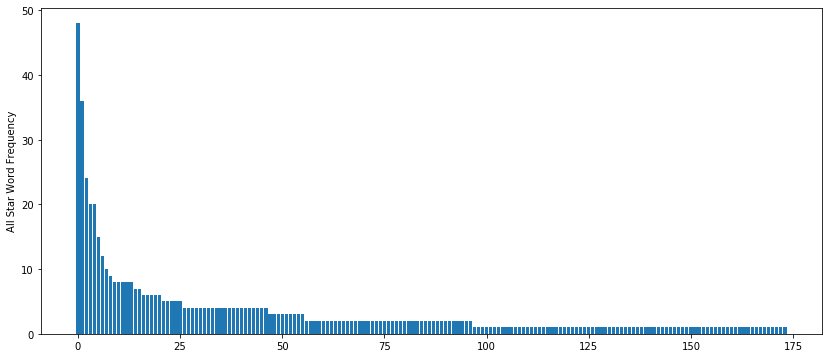

In [47]:
import matplotlib.pyplot as plt
import numpy as np

word = [word[0] for word in distribution]
freq = [word[1] for word in distribution]
x_pos = np.arange(len(word)) 

plt.figure(figsize=(14,6))
plt.bar(x_pos,freq)
# plt.xticks(x_pos, word,fontsize=11) 
plt.ylabel('All Star Word Frequency')
plt.show()

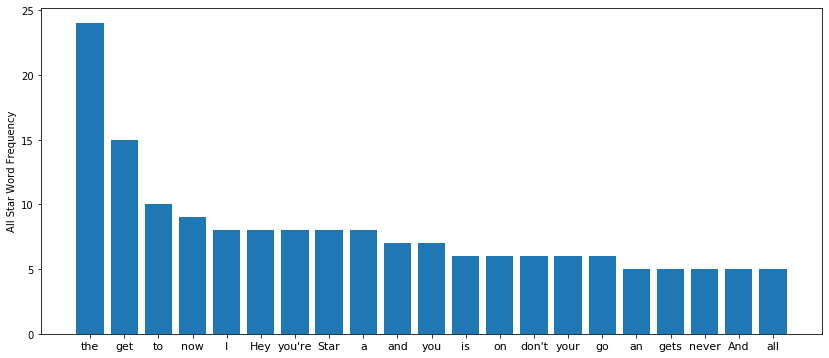

In [48]:
word = [word[0] for word in distribution_filtered]
freq = [word[1] for word in distribution_filtered]
x_pos = np.arange(len(word)) 

plt.figure(figsize=(14,6))
plt.bar(x_pos,freq)
plt.xticks(x_pos, word,fontsize=11) 
plt.ylabel('All Star Word Frequency')
plt.show()

## 5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**
       - How many unique words are there?
       - List what will Rick Astley never do?
       - Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to 

In [49]:
from bs4 import BeautifulSoup

In [59]:
def get_azlyrics(path):
    with open(path, "r", encoding='utf-8') as f:
        soup = BeautifulSoup(f.read())
    lyrics_tags = soup.find_all("div", attrs={"class": None, "id": None})
    lyrics = [tag.getText() for tag in lyrics_tags]
    return [line for line in lyrics[0].split('\n') if line !='']

In [60]:
path = 'data/Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html'
lyrics = get_azlyrics(path)

In [91]:
rick_never_gonna = list(set([line[12:] for line in lyrics 
                             if 'Never gonna' in line and line != 'Never gonna give, never gonna give']))

In [92]:
rick_never_gonna

['give you up',
 'make you cry',
 'run around and desert you',
 'say goodbye',
 'let you down',
 'tell a lie and hurt you']

In [93]:
dist_rickroll = FreqDist([word for line in lyrics for word in line.split()])
dist_rickroll = dict(dist_rickroll)

In [94]:
#frequency distribution of words sorted
dist_rickroll = sorted(dist_rickroll.items(), key=lambda kv: kv[1], reverse = True)

In [101]:
def get_sorted_dist(lyrics):
    dist = dict(FreqDist([word for line in lyrics for word in line.split()]))
    return sorted(dist.items(), key=lambda kv: kv[1], reverse = True)

In [95]:
dist_rickroll[:5]

[('gonna', 42), ('you', 39), ('Never', 38), ('and', 15), ('give', 10)]

In [96]:
print('Unique words: {}'.format(len(dist_rickroll)))

Unique words: 88


In [97]:
for i in rick_never_gonna:
    print('Rick Astley will never {}.'.format(i))

Rick Astley will never give you up.
Rick Astley will never make you cry.
Rick Astley will never run around and desert you.
Rick Astley will never say goodbye.
Rick Astley will never let you down.
Rick Astley will never tell a lie and hurt you.


### Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

In [99]:
mqnlyrics = get_azlyrics('data/Sergio Mendes - Mas Que Nada Lyrics | AZLyrics.com.html')

In [100]:
mqnlyrics

['Oooo, aria raio, oba, oba, oba',
 'O o-o-o-o arya ayo, oba, oba, oba',
 'Mas que nada',
 'Sai da minha frente',
 'Que eu quero passar',
 'Pois o samba esta animado',
 'O que eu quero e sambar',
 'Este samba',
 'Que e misto de maracatu',
 'E samba de preto velho',
 'Samba de preto tu',
 'Mas que nada',
 'Um samba como este tao legal',
 'Voce nao vai querer',
 'Que eu chegue no final',
 'Oooo, aria raio, oba, oba, oba',
 'O o-o-o-o arya ayo, oba, oba, oba',
 'Mas que nada',
 'Sai da minha frente',
 'Que eu quero passar',
 'Pois o samba esta animado',
 'O que eu quero e sambar',
 'Este samba',
 'Que e misto de maracatu',
 'E samba de preto velho',
 'Samba de preto tu',
 'Mas que nada',
 'Um samba como este tao legal',
 'Voce nao vai querer',
 'Que eu chegue no final',
 'Oooo, aria raio, oba, oba, oba',
 'O o-o-o-o arya ayo, oba, oba, oba',
 'Oba, oba, oba',
 'Oba, oba, oba',
 'Oba, oba...']

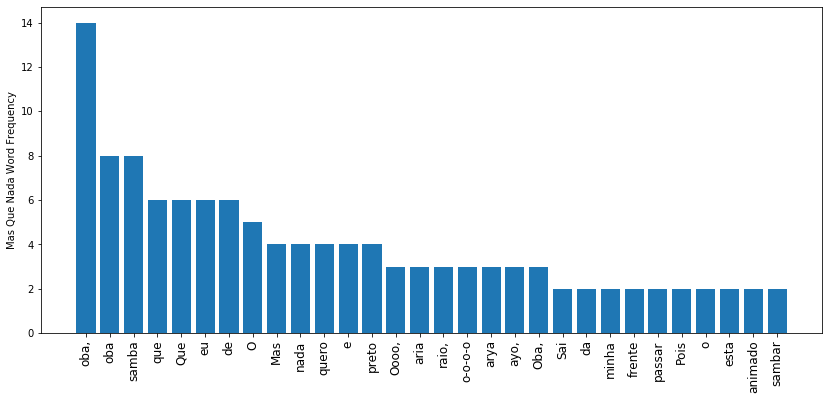

In [111]:
distmqn = get_sorted_dist(mqnlyrics)[:30]

word = [word[0] for word in distmqn]
freq = [word[1] for word in distmqn]
x_pos = np.arange(len(word)) 

plt.figure(figsize=(14,6))
plt.bar(x_pos,freq)
plt.xticks(x_pos, word,fontsize=12, rotation = 'vertical') 
plt.ylabel('Mas Que Nada Word Frequency')
plt.show()

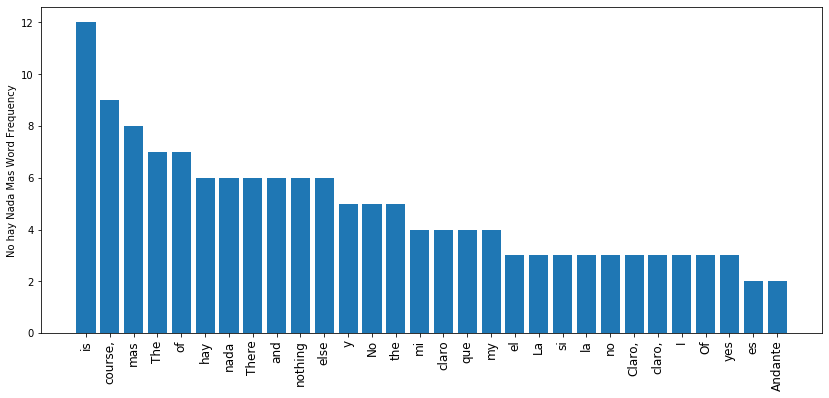

In [110]:
nhnm_lyrics = get_azlyrics('data/Mos Def - No Hay Nada Mas Lyrics | AZLyrics.com.html')


dist_nhnm = get_sorted_dist(nhnm_lyrics)[:30]

word = [word[0] for word in dist_nhnm]
freq = [word[1] for word in dist_nhnm]
x_pos = np.arange(len(word)) 

plt.figure(figsize=(14,6))
plt.bar(x_pos,freq)
plt.xticks(x_pos, word,fontsize=12, rotation = 'vertical') 
plt.ylabel('No hay Nada Mas Word Frequency')
plt.show()

In [113]:
import time
print("Ending probset at {} lol".format(time.ctime()))

Ending probset at Thu Jan 30 20:57:06 2020 lol
